In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("house_price.csv", usecols=["GarageQual", "FireplaceQu", "SalePrice"])

In [8]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [9]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [10]:
df["FireplaceQu_imputed"] = df["FireplaceQu"]

In [11]:
df.head()

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed
0,NaN,TA,208500,NaN
1,TA,TA,181500,TA
2,TA,TA,223500,TA
3,Gd,TA,140000,Gd
4,TA,TA,250000,TA


In [12]:
x = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [14]:
x_train.head()

,FireplaceQu,GarageQual,FireplaceQu_imputed
1114,NaN,TA,NaN
1181,Gd,TA,Gd
430,NaN,TA,NaN
758,NaN,TA,NaN
606,NaN,TA,NaN


In [15]:
x_train["FireplaceQu_imputed"][x_train["FireplaceQu_imputed"].isnull()] = x_train["FireplaceQu_imputed"].dropna().sample(x_train["FireplaceQu_imputed"].isnull().sum()).values
x_test["FireplaceQu_imputed"][x_test["FireplaceQu_imputed"].isnull()] = x_test["FireplaceQu_imputed"].dropna().sample(x_test["FireplaceQu_imputed"].isnull().sum()).values

/tmp/ipykernel_9955/2301049883.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train["FireplaceQu_imputed"][x_train["FireplaceQu_imputed"].isnull()] = x_train["FireplaceQu_imputed"].dropna().sample(x_train["FireplaceQu_imputed"].isnull

In [17]:
x_train["FireplaceQu_imputed"].isnull().sum()

0

In [16]:
x_test["FireplaceQu_imputed"].isnull().sum()

0

## now lets check the difference in the graph:

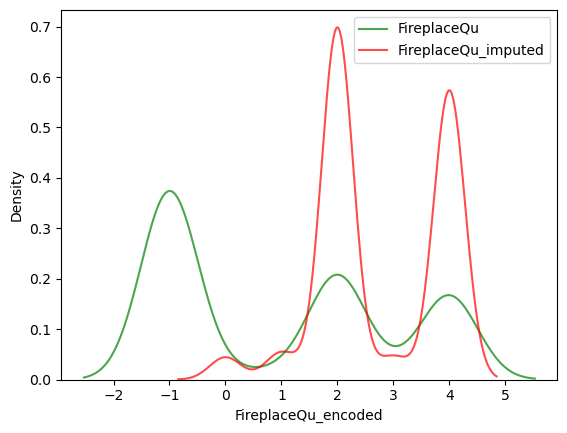

In [28]:
x_train["FireplaceQu_encoded"] = x_train["FireplaceQu"].astype("category").cat.codes
x_train["FireplaceQu_imputed_encoded"] = x_train["FireplaceQu_imputed"].astype("category").cat.codes

sns.kdeplot(x=x_train["FireplaceQu_encoded"], color="green", label="FireplaceQu", alpha=0.7)
sns.kdeplot(x=x_train["FireplaceQu_imputed_encoded"], color="red", label="FireplaceQu_imputed", alpha=0.7)
plt.legend()
plt.show()


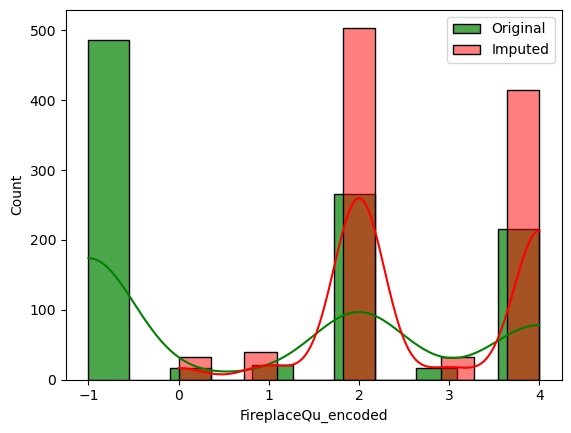

In [29]:
sns.histplot(x_train["FireplaceQu_encoded"], color="green", label="Original", alpha=0.7, kde=True)
sns.histplot(x_train["FireplaceQu_imputed_encoded"], color="red", label="Imputed", alpha=0.5, kde=True)
plt.legend()
plt.show()
